In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# reviews

In [38]:
reviews = pd.read_csv('https://github.com/yyaroslavskiy/cuddly-chainsaw/raw/refs/heads/develop/eda/merge/doctors_review.csv')

In [39]:
reviews

,Unnamed: 0,doctor_name,doctor_link,rate,date,comment,clinic
0,0,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,0.5,2025-05-09,"Обратилась к гинекологу, Шестаковой Татьяне Ни...",«Он Клиник» на Воронцовской 8-ул. Воронцовская...
1,1,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,5.0,2025-04-15,Шестакову Татьяну Николаевну я посетила первый...,«Он Клиник» на Воронцовской 8-ул. Воронцовская...
2,2,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,5.0,2024-11-15,"Приятная в общении, спокойная. Подробно посмот...","Клиника «Мамма»-ул. Вокзальная, стр. 7Б"
3,5,Гутникова Виктория Яковлевна,https://prodoctorov.ru/moskva/vrach/220528-gut...,2.8,2025-03-28,Обратилась к врачу для проведения профилактиче...,"Клиника «ЕвроМед» на Сухаревской-просп. Мира, ..."
4,6,Тагиева Рена Тельмановна,https://prodoctorov.ru/moskva/vrach/917773-tag...,5.0,2025-11-02,Обратилась с целью выдачи заключения перед опе...,Медицинский центр «Гимед» в Жулебино-ул. Генер...
...,...,...,...,...,...,...,...
145264,124674,Гуджалова Инна Витальевна,https://docdoc.ru/doctor/Gudzhalova_Inna,1.0,2018-09-06,Добрый день. Данный врач был вызван на дом. Да...,NaN
145265,124675,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2018-01-20,Самый лучший и адекватный доктор! К пациентам ...,NaN
145266,124676,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2018-01-03,"Хороший, отзывчивый врач! Внимательно относитс...",NaN
145267,124677,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2017-06-09,"Заключение, которое я принесла от другого тера...",NaN


In [40]:
del reviews['Unnamed: 0']

In [41]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [42]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145269 entries, 0 to 145268
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   doctor_name  145269 non-null  object        
 1   doctor_link  145269 non-null  object        
 2   rate         144853 non-null  float64       
 3   date         145269 non-null  datetime64[ns]
 4   comment      145250 non-null  object        
 5   clinic       106000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.7+ MB


In [43]:
reviews.describe()

,rate,date
count,144853.000000,145269
mean,4.521642,2021-12-05 21:31:34.083390464
min,0.000000,2003-02-28 00:00:00
25%,5.000000,2019-04-26 00:00:00
50%,5.000000,2022-08-15 00:00:00
75%,5.000000,2024-08-19 00:00:00
max,5.000000,2108-12-10 00:00:00
std,1.285369,NaN


посмотрим пропуски(функция с сема)

In [44]:
#Воспользуемся следующей функцией, которая предоставляет отчет о пропусках в данных

def missing_values_table(df):
    """
    Функция возвращает резюме по пропущенным значениям
    """
    # Общее число пропусков
    mis_val = df.isnull().sum()

    # Процент пропусков
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Создадит таблицу с результатом
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Переименнуем колонки
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Отсортируем по проценту пропущенных значений
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Выведем некоторую информацию
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    return mis_val_table_ren_columns

missing_values_table(reviews)

Your selected dataframe has 6 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
clinic,39269,27.0
rate,416,0.3
comment,19,0.0


# новый признак - source (откуда отзыв)

In [45]:
reviews['source'] = reviews['doctor_link'].str.extract(r'https://([a-z]+)\.ru')

In [46]:
reviews.source.value_counts()

,count
source,
docdoc,81173
prodoctorov,64096


# date

<Axes: xlabel='date'>

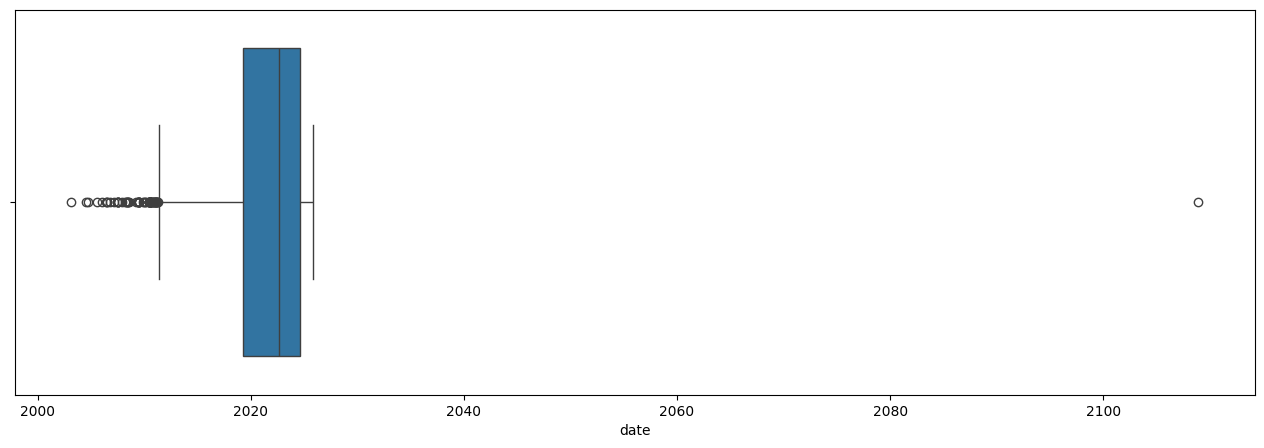

In [47]:
plt.figure(figsize=(16,5))
sns.boxplot(data=reviews, x='date')

In [48]:
reviews[reviews.date == reviews.date.max()]

,doctor_name,doctor_link,rate,date,comment,clinic,source
84817,Болотов Дмитрий Александрович,https://docdoc.ru/doctor/Bolotov_Dmitriy,5.0,2108-12-10,Супер доктор. В 2013 году - резкая боль в лево...,NaN,docdoc


In [49]:
reviews.iloc[84817, 3] = pd.to_datetime('2018-12-10')

<Axes: xlabel='date'>

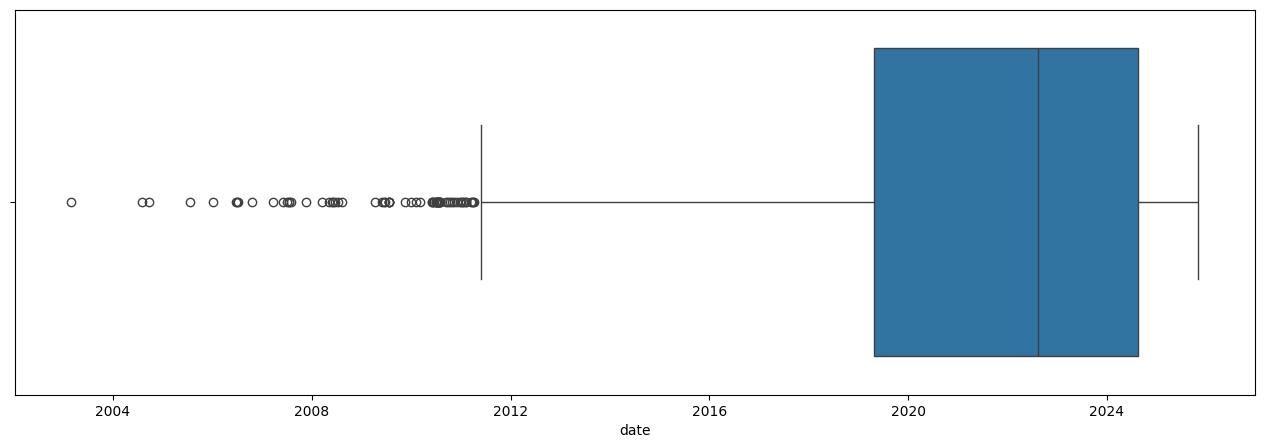

In [50]:
plt.figure(figsize=(16,5))
sns.boxplot(data=reviews, x='date')

In [51]:
q1 = reviews.date.quantile(0.25)
q3 = reviews.date.quantile(0.75)
iqr = q3 - q1

In [52]:
reviews[reviews.date < q1 - 1.5 * iqr]

,doctor_name,doctor_link,rate,date,comment,clinic,source
69468,Кураева Тамара Леонидовна,https://docdoc.ru/doctor/Kuraeva_Tamara,5.0,2010-07-03,"Спасибо Кураевой Т.Л., вела меня все 13 лет бо...",NaN,docdoc
69536,Свириденко Наталья Юрьевна,https://docdoc.ru/doctor/Sviridenko_Natalya,4.0,2006-06-27,"Очень_ толковый врач, меня во всяких районных ...",NaN,docdoc
78960,Зимина Нонна Борисовна,https://docdoc.ru/doctor/Zimina_Nonna,5.0,2010-10-10,"Очень хороший врач и замечательный, отзывчивый...",NaN,docdoc
79350,Долотов Виктор Константинович,https://docdoc.ru/doctor/Dolotov_Viktor,4.0,2010-07-05,"Нам очень понравилось, сразу видно, что он про...",NaN,docdoc
93035,Филатова Елена Глебовна,https://docdoc.ru/doctor/Filatova_Elena_6,5.0,2009-06-03,Не давно опять начались приступы... На этот ра...,NaN,docdoc
...,...,...,...,...,...,...,...
140705,Розанова Виктория Адамовна,https://docdoc.ru/doctor/Rozanova_Viktoriya,5.0,2006-06-20,Добрый день участницы форума. Я хочу всех позд...,NaN,docdoc
141417,Титова Лариса Александровна,https://docdoc.ru/doctor/Titova_Larisa,5.0,2010-06-05,"Титова Лариса Александровна вг,щербинка в подм...",NaN,docdoc
144616,Распопина Наталья Автандиловна,https://docdoc.ru/doctor/Raspopina_Natalya,4.0,2008-05-05,"Замечательный врач , относится с пониманием, в...",NaN,docdoc
144641,Курмазия Нонна Максимовна,https://docdoc.ru/doctor/Kurmaziya_Nonna,5.0,2010-11-11,"Огромное спасибо,доктору диагностического цент...",NaN,docdoc


In [53]:
reviews[reviews.date < q1 - 1.5 * iqr].source.value_counts()

,count
source,
docdoc,68


In [54]:
reviews[reviews.date < q1 - 1.5 * iqr].sort_values('date')

,doctor_name,doctor_link,rate,date,comment,clinic,source
104584,Кузнецова Нина Петровна,https://docdoc.ru/doctor/Kuznetsova_Nina_3,5.0,2003-02-28,Особая благодарность Нине Петровне Кузнецовой ...,NaN,docdoc
103955,Реброва Тамара Васильевна,https://docdoc.ru/doctor/Rebrova_Tamara,5.0,2004-07-30,Я родила в МОНИИАге второго сына неделю назад....,NaN,docdoc
104583,Кузнецова Нина Петровна,https://docdoc.ru/doctor/Kuznetsova_Nina_3,5.0,2004-09-22,Было экстренное кесарево под общим наркозом. С...,NaN,docdoc
109367,Александрова Наталья Александровна,https://docdoc.ru/doctor/Aleksandrova_Natalya_4,5.0,2005-07-20,"Очень хороший специалист, и как человек очень ...",NaN,docdoc
105498,Груздева Ольга Юрьевна,https://docdoc.ru/doctor/Gruzdeva_Olga,5.0,2006-01-08,"Доктор вылечила меня очень быстро, да и просто...",NaN,docdoc
...,...,...,...,...,...,...,...
94089,Медведева Ольга Владимировна,https://docdoc.ru/doctor/Medvedeva_Olga_4,5.0,2011-02-05,доктор самый лучший .успехов и процветания в м...,NaN,docdoc
105378,Макаров Андрей Юрьевич,https://docdoc.ru/doctor/Makarov_Andrey_2,5.0,2011-03-13,"Отличный врач! Лежала в гинекологии, он и мой ...",NaN,docdoc
94835,Поляков Олег Станиславович,https://docdoc.ru/doctor/Polyakov_Oleg_4,5.0,2011-03-22,"Олег Станиславович - врач от Бога и человек , ...",NaN,docdoc
103668,Ильина Ольга Александровна,https://docdoc.ru/doctor/Ilina_Olga_6,4.0,2011-03-31,"Вежливая, аккуратная, внимательная. Хороший сп...",NaN,docdoc


Сервис docdoc существует только с 2012 года, примерно на это же значение приходится граница нижнего уса. Все выбросы по боксплоту (их 68) удалим, как нерепрезентативные отзывы.

Возможно, они были получены с других сайтов/старых форумов, но их источник неточен, и из-за сильной давности они неактуальны.

In [55]:
reviews = reviews[reviews.date >= q1 - 1.5 * iqr].reset_index(drop=True)

In [56]:
reviews

,doctor_name,doctor_link,rate,date,comment,clinic,source
0,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,0.5,2025-05-09,"Обратилась к гинекологу, Шестаковой Татьяне Ни...",«Он Клиник» на Воронцовской 8-ул. Воронцовская...,prodoctorov
1,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,5.0,2025-04-15,Шестакову Татьяну Николаевну я посетила первый...,«Он Клиник» на Воронцовской 8-ул. Воронцовская...,prodoctorov
2,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,5.0,2024-11-15,"Приятная в общении, спокойная. Подробно посмот...","Клиника «Мамма»-ул. Вокзальная, стр. 7Б",prodoctorov
3,Гутникова Виктория Яковлевна,https://prodoctorov.ru/moskva/vrach/220528-gut...,2.8,2025-03-28,Обратилась к врачу для проведения профилактиче...,"Клиника «ЕвроМед» на Сухаревской-просп. Мира, ...",prodoctorov
4,Тагиева Рена Тельмановна,https://prodoctorov.ru/moskva/vrach/917773-tag...,5.0,2025-11-02,Обратилась с целью выдачи заключения перед опе...,Медицинский центр «Гимед» в Жулебино-ул. Генер...,prodoctorov
...,...,...,...,...,...,...,...
145196,Гуджалова Инна Витальевна,https://docdoc.ru/doctor/Gudzhalova_Inna,1.0,2018-09-06,Добрый день. Данный врач был вызван на дом. Да...,NaN,docdoc
145197,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2018-01-20,Самый лучший и адекватный доктор! К пациентам ...,NaN,docdoc
145198,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2018-01-03,"Хороший, отзывчивый врач! Внимательно относитс...",NaN,docdoc
145199,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2017-06-09,"Заключение, которое я принесла от другого тера...",NaN,docdoc


<Axes: xlabel='date'>

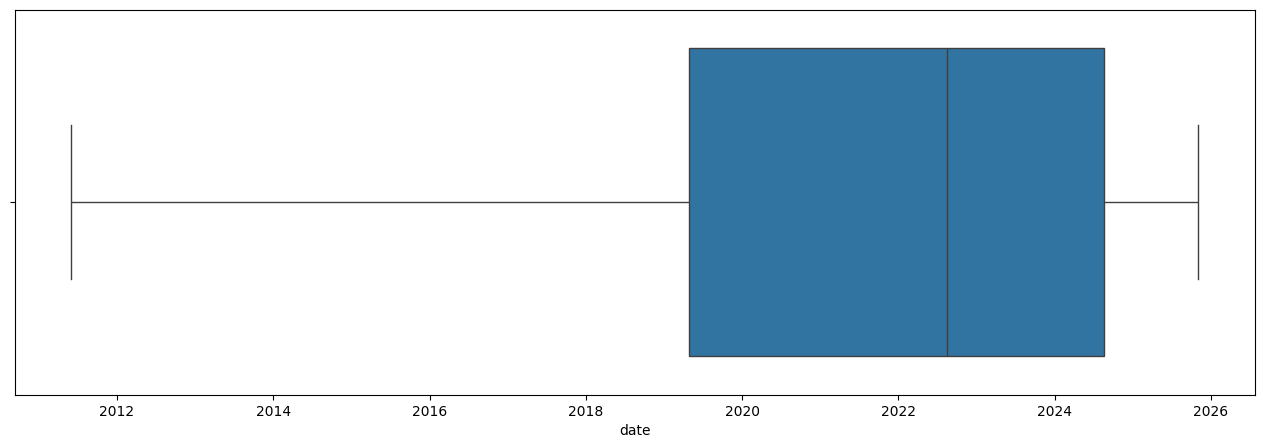

In [57]:
plt.figure(figsize=(16,5))
sns.boxplot(data=reviews, x='date')

In [58]:
reviews['date'].max()

Timestamp('2025-11-04 00:00:00')

# comment

In [59]:
reviews[reviews['comment'].isna()]

,doctor_name,doctor_link,rate,date,comment,clinic,source
43551,Романова Елена Сергеевна,https://prodoctorov.ru/moskva/vrach/109565-rom...,5.0,2014-09-14,NaN,NaN,prodoctorov
70688,Коннова Ирина Петровна,https://docdoc.ru/doctor/Konnova_Irina,5.0,2020-08-01,NaN,NaN,docdoc
71477,Нестерова Наталия Владимировна,https://docdoc.ru/doctor/Nesterova_Nataliya_2,4.0,2019-08-21,NaN,NaN,docdoc
79549,Ашуркова Елена Анатольевна,https://docdoc.ru/doctor/Ashurkova_Elena,5.0,2020-04-02,NaN,NaN,docdoc
83995,Гудкова Олеся Владимировна,https://docdoc.ru/doctor/Gudkova_Olesja,5.0,2019-08-31,NaN,СМ-Клиника на Волгоградском пр. (м. Текстильщики),docdoc
85413,Панов Геннадий Александрович,https://docdoc.ru/doctor/Panov_Gennadiy,5.0,2013-01-25,NaN,NaN,docdoc
88718,Серебренников Валерий Александрович,https://docdoc.ru/doctor/Serebrennikov_Valerii,5.0,2012-10-01,NaN,NaN,docdoc
92975,Бакланов Николай Артемович,https://docdoc.ru/doctor/Baklanov_Nikolay,4.0,2014-12-02,NaN,NaN,docdoc
93128,Соколова Екатерина Юрьевна,https://docdoc.ru/doctor/Sokolova_Ekaterina,5.0,2019-03-11,NaN,NaN,docdoc
93346,Гришина Дарья Александровна,https://docdoc.ru/doctor/Grishina_Darya,5.0,2019-12-03,NaN,NaN,docdoc


Такие отзывы тоже нерепрезентативны и помешают обработке текста. Их достаточно мало, просто удалим такие

In [60]:
reviews = reviews[reviews['comment'].notna()].reset_index(drop=True)
reviews

,doctor_name,doctor_link,rate,date,comment,clinic,source
0,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,0.5,2025-05-09,"Обратилась к гинекологу, Шестаковой Татьяне Ни...",«Он Клиник» на Воронцовской 8-ул. Воронцовская...,prodoctorov
1,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,5.0,2025-04-15,Шестакову Татьяну Николаевну я посетила первый...,«Он Клиник» на Воронцовской 8-ул. Воронцовская...,prodoctorov
2,Шестакова Татьяна Николаевна,https://prodoctorov.ru/moskva/vrach/236399-she...,5.0,2024-11-15,"Приятная в общении, спокойная. Подробно посмот...","Клиника «Мамма»-ул. Вокзальная, стр. 7Б",prodoctorov
3,Гутникова Виктория Яковлевна,https://prodoctorov.ru/moskva/vrach/220528-gut...,2.8,2025-03-28,Обратилась к врачу для проведения профилактиче...,"Клиника «ЕвроМед» на Сухаревской-просп. Мира, ...",prodoctorov
4,Тагиева Рена Тельмановна,https://prodoctorov.ru/moskva/vrach/917773-tag...,5.0,2025-11-02,Обратилась с целью выдачи заключения перед опе...,Медицинский центр «Гимед» в Жулебино-ул. Генер...,prodoctorov
...,...,...,...,...,...,...,...
145177,Гуджалова Инна Витальевна,https://docdoc.ru/doctor/Gudzhalova_Inna,1.0,2018-09-06,Добрый день. Данный врач был вызван на дом. Да...,NaN,docdoc
145178,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2018-01-20,Самый лучший и адекватный доктор! К пациентам ...,NaN,docdoc
145179,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2018-01-03,"Хороший, отзывчивый врач! Внимательно относитс...",NaN,docdoc
145180,Пушкарев Евгений Петрович,https://docdoc.ru/doctor/Pushkarev_Evgeniy,5.0,2017-06-09,"Заключение, которое я принесла от другого тера...",NaN,docdoc


# rate

In [61]:
reviews.rate.value_counts().head()

,count
rate,
5.0,120875
4.0,6203
0.0,5406
1.0,4047
3.8,1259


<Axes: xlabel='rate'>

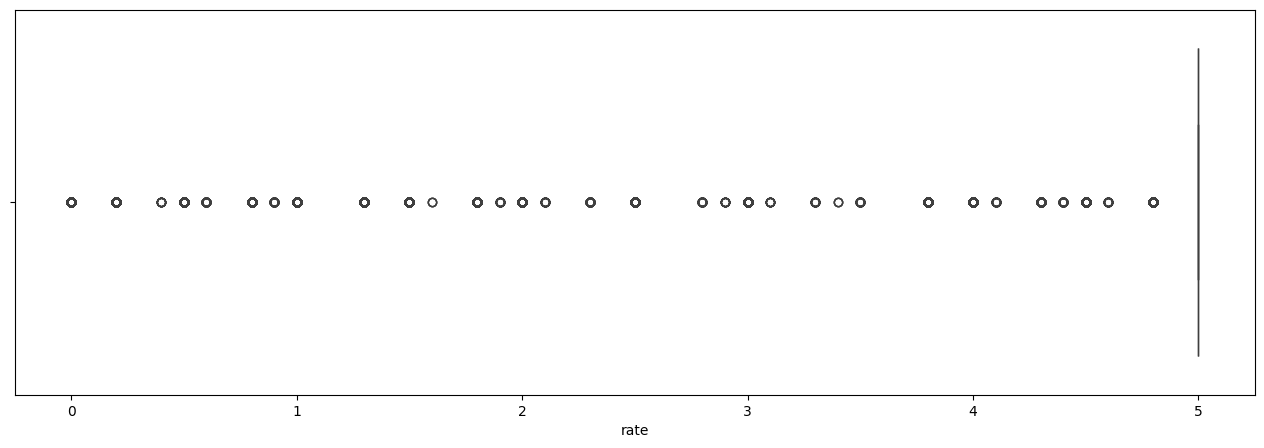

In [62]:
plt.figure(figsize=(16,5))
sns.boxplot(data=reviews, x='rate')

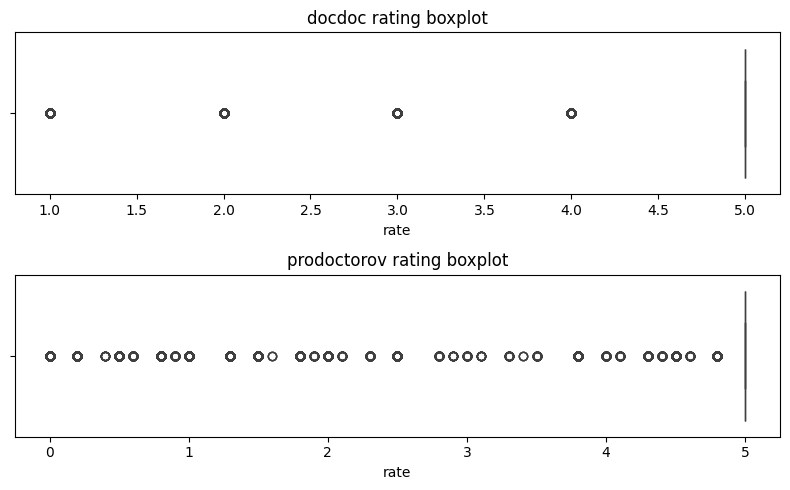

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
ax1, ax2 = axes

sns.boxplot(data=reviews[reviews['source']=='docdoc'], x='rate', ax=ax1)
ax1.set_title('docdoc rating boxplot')

sns.boxplot(data=reviews[reviews['source']=='prodoctorov'], x='rate', ax=ax2)
ax2.set_title('prodoctorov rating boxplot')

plt.tight_layout()
plt.show()

<Axes: xlabel='rate', ylabel='Count'>

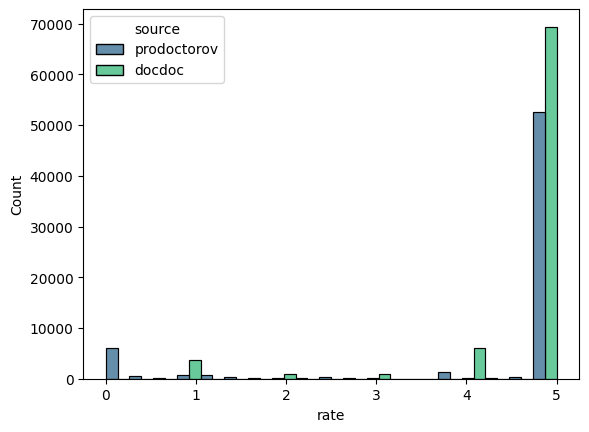

In [64]:
sns.histplot(data=reviews, x='rate', hue='source', multiple='dodge', palette='viridis')

<Axes: xlabel='date', ylabel='rate'>

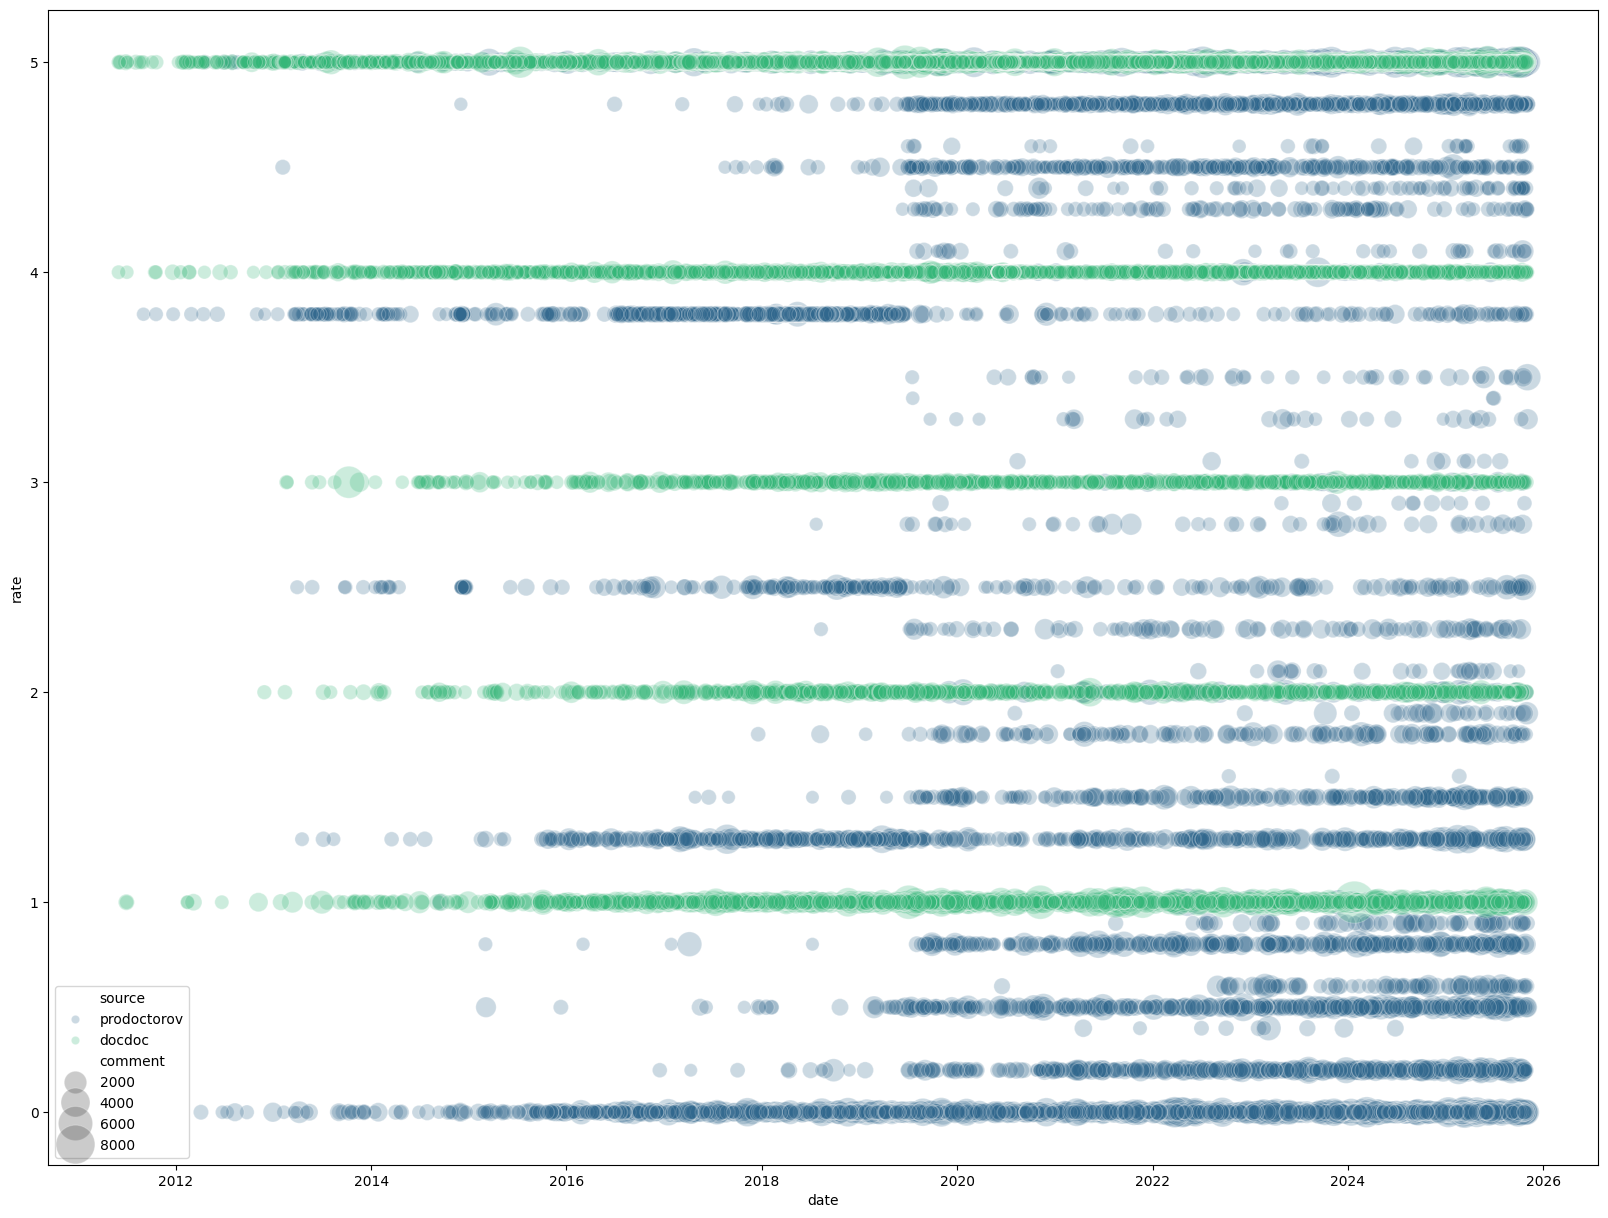

In [65]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=reviews,
                x='date',
                y='rate',
                hue='source',
                size=reviews['comment'].str.len(),
                sizes=(reviews['comment'].str.len().quantile(0.05), reviews['comment'].str.len().quantile(0.95)),
                alpha=0.25,
                palette='viridis')

In [66]:
reviews['comment'].str.len().describe()

,comment
count,145182.000000
mean,360.079548
std,319.935295
min,1.000000
25%,169.000000
50%,267.000000
75%,458.000000
max,9555.000000


In [67]:
reviews['comment'].str.len().quantile(0.9)

np.float64(686.0)

## внимательнее посмотрим на распределение оценок без 5.0

In [68]:
reviews_lower5 = reviews[reviews['rate'] < 5.0]
reviews_lower5.shape

(23891, 7)

<Axes: xlabel='rate'>

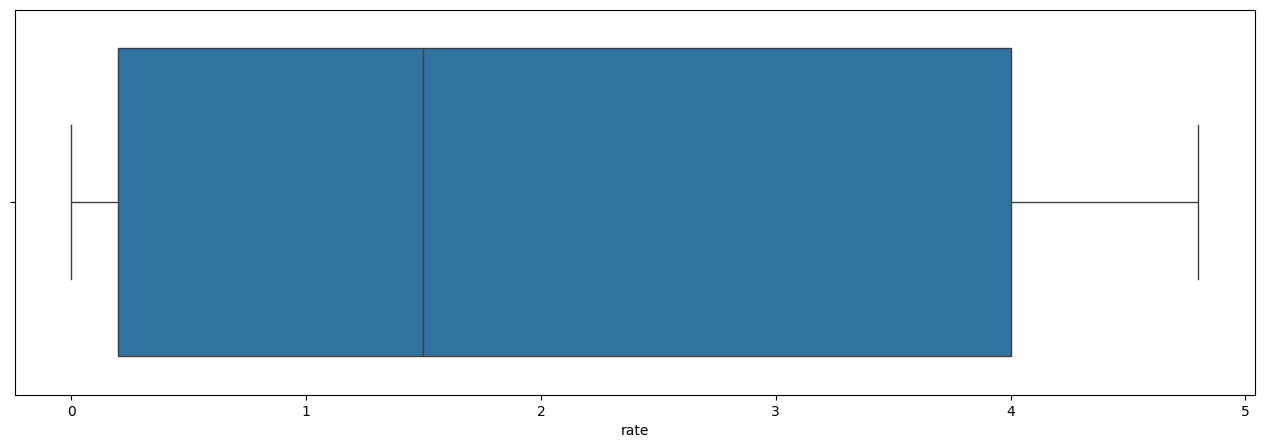

In [69]:
plt.figure(figsize=(16,5))
sns.boxplot(data=reviews_lower5, x='rate')

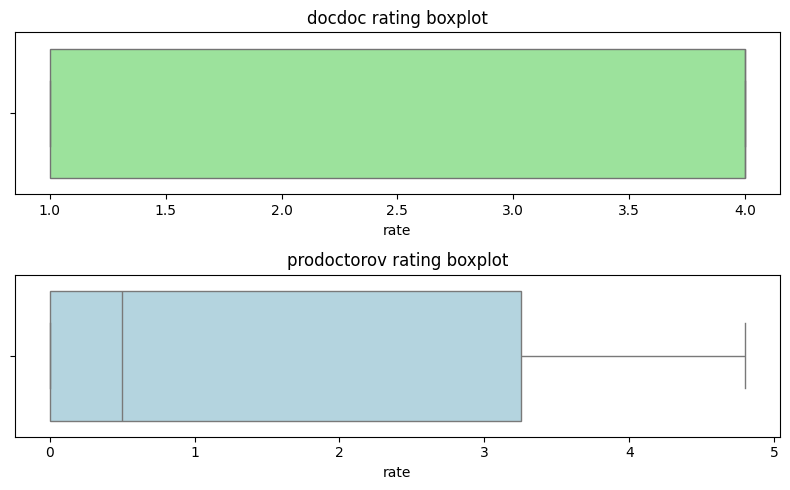

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
ax1, ax2 = axes

sns.boxplot(data=reviews_lower5[reviews_lower5['source']=='docdoc'], x='rate', color='lightgreen', ax=ax1)
ax1.set_title('docdoc rating boxplot')

sns.boxplot(data=reviews_lower5[reviews_lower5['source']=='prodoctorov'], x='rate', color='lightblue', ax=ax2)
ax2.set_title('prodoctorov rating boxplot')

plt.tight_layout()
plt.show()

<Axes: xlabel='rate', ylabel='Count'>

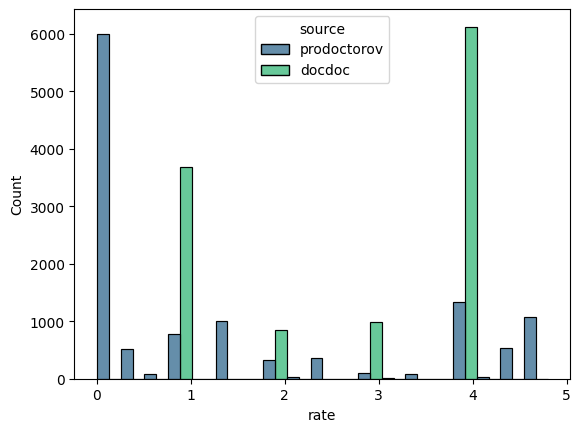

In [71]:
sns.histplot(data=reviews_lower5, x='rate', hue='source', multiple='dodge', palette='viridis')

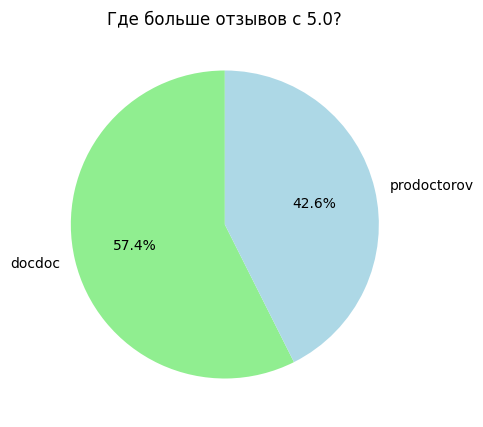

In [72]:
plt.figure(figsize=(5, 5))
plt.pie(reviews[reviews['rate'] == 5.0]['source'].value_counts(),
        labels=reviews[reviews['rate'] == 5.0]['source'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'lightblue'])
plt.title('Где больше отзывов с 5.0?')
plt.show()

# Составление рейтинга врача из среднего по отзыву

In [92]:
mean_rate_sber = reviews[reviews['source'] == 'docdoc'].groupby('doctor_link')['rate'].mean().reset_index()
mean_rate_sber['source'] = 'sber'
mean_rate_sber

,doctor_link,rate,source
0,https://docdoc.ru/doctor/ALEKSANDROVA_LYuDMILA_5,4.85,sber
1,https://docdoc.ru/doctor/ARISTARHOVA_NADEZhDA,5.00,sber
2,https://docdoc.ru/doctor/ASTAPOVICh_NATALYa_2,5.00,sber
3,https://docdoc.ru/doctor/Aakef_Hayder,5.00,sber
4,https://docdoc.ru/doctor/Abacheva_Maida,5.00,sber
...,...,...,...
14702,https://docdoc.ru/doctor/Zykov_Andrey_2,3.40,sber
14703,https://docdoc.ru/doctor/Zykova_Anna_3,5.00,sber
14704,https://docdoc.ru/doctor/Zyryanova_Evgeniya,5.00,sber
14705,https://docdoc.ru/doctor/Zyryanova_Olga_7,1.00,sber


In [93]:
mean_rate_prod = reviews[reviews['source'] == 'prodoctorov'].groupby('doctor_link')['rate'].mean().reset_index()
mean_rate_prod['source'] = 'prodoctorov'
mean_rate_prod

,doctor_link,rate,source
0,https://prodoctorov.ru/moskva/vrach/1000126-ef...,5.000000,prodoctorov
1,https://prodoctorov.ru/moskva/vrach/1000198-re...,5.000000,prodoctorov
2,https://prodoctorov.ru/moskva/vrach/1000240-sl...,5.000000,prodoctorov
3,https://prodoctorov.ru/moskva/vrach/1000281-sa...,5.000000,prodoctorov
4,https://prodoctorov.ru/moskva/vrach/1000303-ku...,5.000000,prodoctorov
...,...,...,...
18448,https://prodoctorov.ru/moskva/vrach/999665-saa...,4.933333,prodoctorov
18449,https://prodoctorov.ru/moskva/vrach/999727-ved...,5.000000,prodoctorov
18450,https://prodoctorov.ru/moskva/vrach/999733-dzh...,5.000000,prodoctorov
18451,https://prodoctorov.ru/moskva/vrach/999782-fed...,5.000000,prodoctorov


In [96]:
mean_rate = pd.concat([mean_rate_sber, mean_rate_prod])
mean_rate

,doctor_link,rate,source
0,https://docdoc.ru/doctor/ALEKSANDROVA_LYuDMILA_5,4.850000,sber
1,https://docdoc.ru/doctor/ARISTARHOVA_NADEZhDA,5.000000,sber
2,https://docdoc.ru/doctor/ASTAPOVICh_NATALYa_2,5.000000,sber
3,https://docdoc.ru/doctor/Aakef_Hayder,5.000000,sber
4,https://docdoc.ru/doctor/Abacheva_Maida,5.000000,sber
...,...,...,...
18448,https://prodoctorov.ru/moskva/vrach/999665-saa...,4.933333,prodoctorov
18449,https://prodoctorov.ru/moskva/vrach/999727-ved...,5.000000,prodoctorov
18450,https://prodoctorov.ru/moskva/vrach/999733-dzh...,5.000000,prodoctorov
18451,https://prodoctorov.ru/moskva/vrach/999782-fed...,5.000000,prodoctorov


In [97]:
mean_rate.to_csv('mean_review_rate', index=False)

# Обработка текста (комментария из отзыва)